In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.colors import ListedColormap

import string

import nltk
nltk.download('stopwords')
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuarw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Fazer agora com todos os elementos!

Vamos realizar uma limpeza nos dados!

In [2]:
#Limpa o texto, retira a pontuação e as stopwords
#Recebe o texto de uma ementa (uma string, um elemento de texto de uma lista)
def clean_text(text_synopses):
    #Retira as pontuações
    nopunc = [char for char in text_synopses if char not in string.punctuation]
    #Juntar para formar novamente as strings
    nopunc = ''.join(nopunc)
    #Remover as stopwords
    text_nopunc = [word for word in nopunc.split() if word.lower not in stopwords.words('portuguese')]
    return text_nopunc
#Vai retornar uma lista com cada palavra sendo um elemento dessa lista

In [3]:
#Determina a frequência de cada palavra no texto da ementa e cria um DataFrame 
#Recebe uma lista, onde cada palavra é um elemento dessa lista (já limpa, sem pontuação e stopwords)
def freq_text(text_synopses):
    freq_dist =nltk.FreqDist(text_synopses)
    freq_df = pd.DataFrame(freq_dist.items(), columns=['PALAVRA', 'FREQUÊNCIA'])
    freq_df.sort_values(by=['FREQUÊNCIA'], inplace=True, ascending=False)
    return freq_df
#Retorna o DataFrame com a frequência de cada palavra

In [4]:
#Busca a as frequências das palavras de interesse 
#Recebe um Data Frame com a frequência de cada palavra e uma lista com as palavras
def search_words(freq_df, list_search):
    word_df=pd.DataFrame()
    for i in range(len(list_search)):
        word_df = (freq_df[freq_df['PALAVRA'] == list_search[i]]).append(word_df)
        word_df.sort_values(by=['FREQUÊNCIA'], inplace=True, ascending=False)
        sum_freq = int(word_df['FREQUÊNCIA'].sum())
    return sum_freq
#Retorna um DataFrame com a frequência de cada palavra de buscada
#Retorna a soma (int) das frequências de cada palavra buscada

In [8]:
def soma_risco(lista_busca, lista_ementas, n):
    texto_limpo = clean_text(lista_ementas[n])
    frequencia_df = freq_text(texto_limpo)
    word_df=pd.DataFrame()
    sum_freq = []
    for i in range(len(lista_busca)):
        word_df = (frequencia_df[frequencia_df['PALAVRA'] == lista_busca[i]]).append(word_df)
        word_df.sort_values(by=['FREQUÊNCIA'], inplace=True, ascending=False)
        sum_freq = int(word_df['FREQUÊNCIA'].sum())
    return sum_freq

In [37]:
def main():
    df_excel = pd.read_excel("Ementas.xlsx", sheet_name='PPC-IES2')
    lista_ementas = list(df[df['Conteúdo das Ementas'].notnull()]['Conteúdo das Ementas'])

    lista_busca = ['risco', 'segurança', 'saúde', 'ocupacional', 'higiene', 
               'análise de risco', 'acidente, risco humano', 'explosão, incêndio', 'saúde ocupacional', 'riscos', 
               'acidentes', 'perigos']
    
    vetor_soma = []
    for i in range(len(lista_ementas)):
        vetor_soma.append(soma_risco(lista_busca, lista_ementas, i))
    return vetor_soma, df_excel, lista_ementas

In [38]:
v, df, lista = main()
v

[6,
 6,
 3,
 4,
 4,
 3,
 3,
 0,
 2,
 24,
 3,
 1,
 5,
 8,
 3,
 0,
 5,
 2,
 0,
 6,
 3,
 16,
 1,
 2,
 5,
 12,
 3,
 0,
 0]

In [39]:
len(v)

29

In [28]:
df[df['Conteúdo das Ementas'].notnull()]

,Região do Brasil,Unidade Federativa,Nome da IES,Sigla,Plano Pedagógico de Curso,Matriz Curricular,Ementas,Segurança de Processo,Risco de Processo,Higiene e Segurança do Trabalho,Segurança no Laboratório,Disciplina Complementar (*) Possível assoiciação com segurança de processo por análise de ementa,Nomenclatura da Disciplina de Segurança de Processo,Nome das Ementas,Conteúdo das Ementas
9,Nordeste,Maranhão,Universidade Federal do Maranhão,UFMA,NÃO,SIM,SIM,SIM(Op),NÃO,SIM(Op),NÃO,NaN,Segurança de Processos e Prevenção de Perdas,Ementa de Segurança de Processo,"Prevenção de perdas: riscos e perigos, aciden..."
10,Nordeste,Maranhão,Universidade Federal do Maranhão,UFMA,NÃO,SIM,SIM,SIM(Op),NÃO,SIM(Op),NÃO,NaN,Segurança de Processos e Prevenção de Perdas,Ementa de Higiente e Segurança do Trabalho,"Prevenção de perdas: riscos e perigos, acident..."
11,Nordeste,Rio Grande do Norte,Universidade Federal do Rio Grande do Norte,UFRN,SIM,SIM,SIM,NÃO,NÃO,SIM(Ob),NÃO,NaN,NaN,Ementa de Higiente e Segurança do Trabalho,"segurança no trabalho, educação ambiental. Ger..."
12,Nordeste,Pernambuco,Universidade Federal Rural de Pernambuco,UFRPE,SIM,SIM,SIM,NÃO,NÃO,SIM(Ob),NÃO,NaN,NaN,Ementa de Higiente e Segurança do Trabalho,"Higiene, condições e meio ambiente de trabalh..."
13,Nordeste,Bahia,Universidade Estadual de Santa Cruz (UESC),UESC,SIM,SIM,SIM,NÃO,NÃO,SIM(Ob),NÃO,NaN,NaN,Ementa de Higiente e Segurança do Trabalho,Trabalho: definições e evolução histórica. Val...
14,Nordeste,Rio Grande do Norte,Universidade Federal Rural do Semi-Árido,UFERSA,NÃO,SIM,NÃO,SIM(Op),NÃO,SIM(Ob),NÃO,NaN,NaN,Ementa de Higiente e Segurança do Trabalho,Noções de saúde ocupacional agentes causadore...
16,Norte,Amazonas,Universidade do Estado do Amazonas (UEA),UEA,NÃO,SIM,NÃO,NÃO,NÃO,SIM(Op),NÃO,NaN,NaN,Ementa de Higiente e Segurança do Trabalho,"Ventilação, Equipamentos de proteção indivi..."
18,Norte,Pará,Universidade Federal do Sul e Sudeste do Pará,UNIFESSPA,SIM,SIM,SIM,NÃO,NÃO,SIM(Op),NÃO,NaN,NaN,Ementa de Higiente e Segurança do Trabalho,SSMA-Definição/Introdução; Manuseio de Produto...
19,Sudeste,Minas Gerais,Universidade Federal de Alfenas,UNIFAL-MG,SIM,SIM,SIM,NÃO,NÃO,SIM(Ob),NÃO,Processos das Inústrias Químicas de Alimentos,NaN,Ementa de Higiente e Segurança do Trabalho,Os objetivos da indústria. Programações de pro...
21,Sudeste,Minas Gerais,Universidade Federal de Lavras,UFLA,SIM,SIM,SIM,NÃO,NÃO,SIM(Ob),NÃO,NaN,NaN,Ementa de Higiente e Segurança do Trabalho,Conceitos e importância da segurança do traba...


In [40]:
df[df['Conteúdo das Ementas'].notnull()]['Qtd de Risco'] = v

<ipython-input-40-8adc50607507>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Conteúdo das Ementas'].notnull()]['Qtd de Risco'] = v


In [57]:
risco = df[df['Conteúdo das Ementas'].notnull()]
len(risco)

29

In [49]:
len(v)

29

In [52]:
len(df.columns)

15

In [59]:
risco.insert(len(df.columns), "QTD2", v, allow_duplicates=False)

In [79]:
risco

,Região do Brasil,Unidade Federativa,Nome da IES,Sigla,Plano Pedagógico de Curso,Matriz Curricular,Ementas,Segurança de Processo,Risco de Processo,Higiene e Segurança do Trabalho,Segurança no Laboratório,Disciplina Complementar (*) Possível assoiciação com segurança de processo por análise de ementa,Nomenclatura da Disciplina de Segurança de Processo,Nome das Ementas,Conteúdo das Ementas,QTD,QTD2
9,Nordeste,Maranhão,Universidade Federal do Maranhão,UFMA,NÃO,SIM,SIM,SIM(Op),NÃO,SIM(Op),NÃO,NaN,Segurança de Processos e Prevenção de Perdas,Ementa de Segurança de Processo,"Prevenção de perdas: riscos e perigos, aciden...",4,6
10,Nordeste,Maranhão,Universidade Federal do Maranhão,UFMA,NÃO,SIM,SIM,SIM(Op),NÃO,SIM(Op),NÃO,NaN,Segurança de Processos e Prevenção de Perdas,Ementa de Higiente e Segurança do Trabalho,"Prevenção de perdas: riscos e perigos, acident...",4,6
11,Nordeste,Rio Grande do Norte,Universidade Federal do Rio Grande do Norte,UFRN,SIM,SIM,SIM,NÃO,NÃO,SIM(Ob),NÃO,NaN,NaN,Ementa de Higiente e Segurança do Trabalho,"segurança no trabalho, educação ambiental. Ger...",4,3
12,Nordeste,Pernambuco,Universidade Federal Rural de Pernambuco,UFRPE,SIM,SIM,SIM,NÃO,NÃO,SIM(Ob),NÃO,NaN,NaN,Ementa de Higiente e Segurança do Trabalho,"Higiene, condições e meio ambiente de trabalh...",4,4
13,Nordeste,Bahia,Universidade Estadual de Santa Cruz (UESC),UESC,SIM,SIM,SIM,NÃO,NÃO,SIM(Ob),NÃO,NaN,NaN,Ementa de Higiente e Segurança do Trabalho,Trabalho: definições e evolução histórica. Val...,4,4
14,Nordeste,Rio Grande do Norte,Universidade Federal Rural do Semi-Árido,UFERSA,NÃO,SIM,NÃO,SIM(Op),NÃO,SIM(Ob),NÃO,NaN,NaN,Ementa de Higiente e Segurança do Trabalho,Noções de saúde ocupacional agentes causadore...,4,3
16,Norte,Amazonas,Universidade do Estado do Amazonas (UEA),UEA,NÃO,SIM,NÃO,NÃO,NÃO,SIM(Op),NÃO,NaN,NaN,Ementa de Higiente e Segurança do Trabalho,"Ventilação, Equipamentos de proteção indivi...",4,3
18,Norte,Pará,Universidade Federal do Sul e Sudeste do Pará,UNIFESSPA,SIM,SIM,SIM,NÃO,NÃO,SIM(Op),NÃO,NaN,NaN,Ementa de Higiente e Segurança do Trabalho,SSMA-Definição/Introdução; Manuseio de Produto...,4,0
19,Sudeste,Minas Gerais,Universidade Federal de Alfenas,UNIFAL-MG,SIM,SIM,SIM,NÃO,NÃO,SIM(Ob),NÃO,Processos das Inústrias Químicas de Alimentos,NaN,Ementa de Higiente e Segurança do Trabalho,Os objetivos da indústria. Programações de pro...,4,2
21,Sudeste,Minas Gerais,Universidade Federal de Lavras,UFLA,SIM,SIM,SIM,NÃO,NÃO,SIM(Ob),NÃO,NaN,NaN,Ementa de Higiente e Segurança do Trabalho,Conceitos e importância da segurança do traba...,4,24


In [80]:
risco2 = risco.drop(columns=['Plano Pedagógico de Curso', 'Matriz Curricular', 'Ementas', 'Segurança de Processo', 'Risco de Processo',
                            'Higiene e Segurança do Trabalho', 'Segurança no Laboratório', 'Disciplina Complementar (*) Possível assoiciação com segurança de processo por análise de ementa', 'QTD'])

In [82]:
risco2 = risco2.reset_index()
del risco2['index']

In [84]:
del risco2 ['level_0']

In [85]:
risco2

,Região do Brasil,Unidade Federativa,Nome da IES,Sigla,Nomenclatura da Disciplina de Segurança de Processo,Nome das Ementas,Conteúdo das Ementas,QTD2
0,Nordeste,Maranhão,Universidade Federal do Maranhão,UFMA,Segurança de Processos e Prevenção de Perdas,Ementa de Segurança de Processo,"Prevenção de perdas: riscos e perigos, aciden...",6
1,Nordeste,Maranhão,Universidade Federal do Maranhão,UFMA,Segurança de Processos e Prevenção de Perdas,Ementa de Higiente e Segurança do Trabalho,"Prevenção de perdas: riscos e perigos, acident...",6
2,Nordeste,Rio Grande do Norte,Universidade Federal do Rio Grande do Norte,UFRN,NaN,Ementa de Higiente e Segurança do Trabalho,"segurança no trabalho, educação ambiental. Ger...",3
3,Nordeste,Pernambuco,Universidade Federal Rural de Pernambuco,UFRPE,NaN,Ementa de Higiente e Segurança do Trabalho,"Higiene, condições e meio ambiente de trabalh...",4
4,Nordeste,Bahia,Universidade Estadual de Santa Cruz (UESC),UESC,NaN,Ementa de Higiente e Segurança do Trabalho,Trabalho: definições e evolução histórica. Val...,4
5,Nordeste,Rio Grande do Norte,Universidade Federal Rural do Semi-Árido,UFERSA,NaN,Ementa de Higiente e Segurança do Trabalho,Noções de saúde ocupacional agentes causadore...,3
6,Norte,Amazonas,Universidade do Estado do Amazonas (UEA),UEA,NaN,Ementa de Higiente e Segurança do Trabalho,"Ventilação, Equipamentos de proteção indivi...",3
7,Norte,Pará,Universidade Federal do Sul e Sudeste do Pará,UNIFESSPA,NaN,Ementa de Higiente e Segurança do Trabalho,SSMA-Definição/Introdução; Manuseio de Produto...,0
8,Sudeste,Minas Gerais,Universidade Federal de Alfenas,UNIFAL-MG,NaN,Ementa de Higiente e Segurança do Trabalho,Os objetivos da indústria. Programações de pro...,2
9,Sudeste,Minas Gerais,Universidade Federal de Lavras,UFLA,NaN,Ementa de Higiente e Segurança do Trabalho,Conceitos e importância da segurança do traba...,24


# AGORA É a PARTE PARA BRINCAR

In [94]:
risco2.groupby('Nome da IES').sum()

,QTD2
Nome da IES,
"Universidade Estadual Paulista ""Júlio de Mesquita Filho"" (UNESP)",9
Universidade Estadual de Campinas (UNICAMP),2
Universidade Estadual de Maringá (UEM),0
Universidade Estadual de Santa Cruz (UESC),4
Universidade Estadual do Oeste do Paraná (UNIOESTE),0
Universidade Federal Fluminense,0
Universidade Federal Rural de Pernambuco,4
Universidade Federal Rural do Semi-Árido,3
Universidade Federal da Integração Latino-Americana,1


In [97]:
risco2.groupby(['Unidade Federativa', 'Nome da IES']).sum()

QTD2
Unidade Federativa   Nome da IES                                             
Amazonas             Universidade do Estado do Amazonas (UEA)               3
Bahia                Universidade Estadual de Santa Cruz (UESC)             4
Paraná               Universidade Estadual do Oeste do Paraná (UNIOE...     0
Parará               Universidade Estadual de Maringá (UEM)                 0
São Paulo            Universidade Estadual Paulista "Júlio de Mesqui...     9
                     Universidade Estadual de Campinas (UNICAMP)            2
                     Universidade de São Paulo (USP)                        5
 Maranhão            Universidade Federal do Maranhão                      12
 Minas Gerais        Universidade Federal de Alfenas                        2
                     Universidade Federal de Lavras                        24
                     Universidade Federal de São João del-Rei               3
                     Universidade Federal de Uberlândia                     5
                     Universidade Federal do Triângulo Mineiro             11
 Paraná              Universidade Federal da Integração Latino-Ameri...     1
                     Universidade Tecnológica Federal do Paraná            16
 Pará                Universidade Federal do Sul e Sudeste do Pará          0
 Pernambuco          Universidade Federal Rural de Pernambuco               4
 Rio Grande do Norte Universidade Federal Rural do Semi-Árido               3
                     Universidade Federal do Rio Grande do Norte            3
 Rio Grande do Sul   Universidade Federal de Santa Maria                    2
                     Universidade Federal do Pampa                         17
                     Universidade Federal do Rio Grande                     3
 Rio de Janeiro      Universidade Federal Fluminense                        0
 São Paulo           Universidade Federal de São Paulo                      1

In [98]:
risco2.groupby(['Região do Brasil','Unidade Federativa', 'Nome da IES']).sum()

QTD2
Região do Brasil Unidade Federativa   Nome da IES                                             
Nordeste         Bahia                Universidade Estadual de Santa Cruz (UESC)             4
                  Maranhão            Universidade Federal do Maranhão                      12
                  Pernambuco          Universidade Federal Rural de Pernambuco               4
                  Rio Grande do Norte Universidade Federal Rural do Semi-Árido               3
                                      Universidade Federal do Rio Grande do Norte            3
Norte            Amazonas             Universidade do Estado do Amazonas (UEA)               3
                  Pará                Universidade Federal do Sul e Sudeste do Pará          0
Sudeste          São Paulo            Universidade Estadual Paulista "Júlio de Mesqui...     9
                                      Universidade Estadual de Campinas (UNICAMP)            2
                                      Universidade de São Paulo (USP)                        5
                  Minas Gerais        Universidade Federal de Alfenas                        2
                                      Universidade Federal de Lavras                        24
                                      Universidade Federal de São João del-Rei               3
                                      Universidade Federal de Uberlândia                     5
                                      Universidade Federal do Triângulo Mineiro             11
                  Rio de Janeiro      Universidade Federal Fluminense                        0
                  São Paulo           Universidade Federal de São Paulo                      1
Sul              Paraná               Universidade Estadual do Oeste do Paraná (UNIOE...     0
                 Parará               Universidade Estadual de Maringá (UEM)                 0
                  Paraná              Universidade Federal da Integração Latino-Ameri...     1
                                      Universidade Tecnológica Federal do Paraná            16
                  Rio Grande do Sul   Universidade Federal de Santa Maria                    2
                                      Universidade Federal do Pampa                         17
                                      Universidade Federal do Rio Grande                     3

In [99]:
type(risco2.groupby(['Unidade Federativa', 'Nome da IES']).sum())

pandas.core.frame.DataFrame

In [100]:
risco2.groupby(['Unidade Federativa', 'Nome da IES'], as_index=False).sum()

,Unidade Federativa,Nome da IES,QTD2
0,Amazonas,Universidade do Estado do Amazonas (UEA),3
1,Bahia,Universidade Estadual de Santa Cruz (UESC),4
2,Paraná,Universidade Estadual do Oeste do Paraná (UNIO...,0
3,Parará,Universidade Estadual de Maringá (UEM),0
4,São Paulo,"Universidade Estadual Paulista ""Júlio de Mesqu...",9
5,São Paulo,Universidade Estadual de Campinas (UNICAMP),2
6,São Paulo,Universidade de São Paulo (USP),5
7,Maranhão,Universidade Federal do Maranhão,12
8,Minas Gerais,Universidade Federal de Alfenas,2
9,Minas Gerais,Universidade Federal de Lavras,24


In [ ]:
risco2.groupby(['Unidade Federativa', 'Nome da IES'], as_index=False).sum()

In [103]:
risco_região = risco2.groupby('Região do Brasil', as_index=False).sum()
risco_região

,Região do Brasil,QTD2
0,Nordeste,26
1,Norte,3
2,Sudeste,62
3,Sul,39


In [104]:
risco_Unidade = risco2.groupby('Unidade Federativa', as_index=False).sum()
risco_Unidade

,Unidade Federativa,QTD2
0,Amazonas,3
1,Bahia,4
2,Paraná,0
3,Parará,0
4,São Paulo,16
5,Maranhão,12
6,Minas Gerais,45
7,Paraná,17
8,Pará,0
9,Pernambuco,4


In [108]:
risco2.groupby('Nome da IES').agg({'QTD2':'sum', 'QTD2':'mean' })

,QTD2
Nome da IES,
"Universidade Estadual Paulista ""Júlio de Mesquita Filho"" (UNESP)",4.5
Universidade Estadual de Campinas (UNICAMP),1.0
Universidade Estadual de Maringá (UEM),0.0
Universidade Estadual de Santa Cruz (UESC),4.0
Universidade Estadual do Oeste do Paraná (UNIOESTE),0.0
Universidade Federal Fluminense,0.0
Universidade Federal Rural de Pernambuco,4.0
Universidade Federal Rural do Semi-Árido,3.0
Universidade Federal da Integração Latino-Americana,1.0


array([[<AxesSubplot:title={'center':'QTD2'}>]], dtype=object)

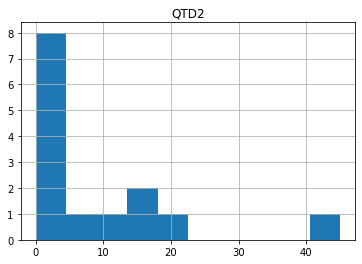

In [106]:
risco_Unidade.hist()